<a href="https://colab.research.google.com/github/Shahidulla-Vantela/CAR_EVAL_DIFFERENT_MODELS/blob/main/Car_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/car.data', sep=',')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
print(df.shape)

(1727, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


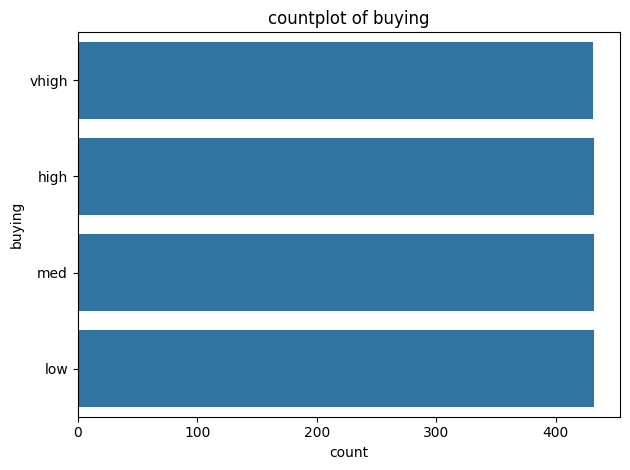

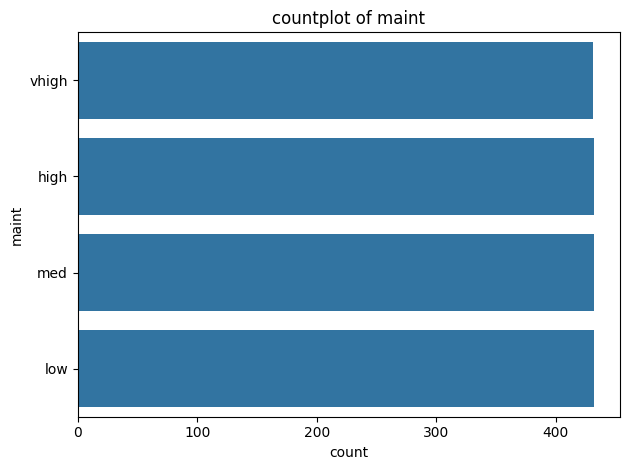

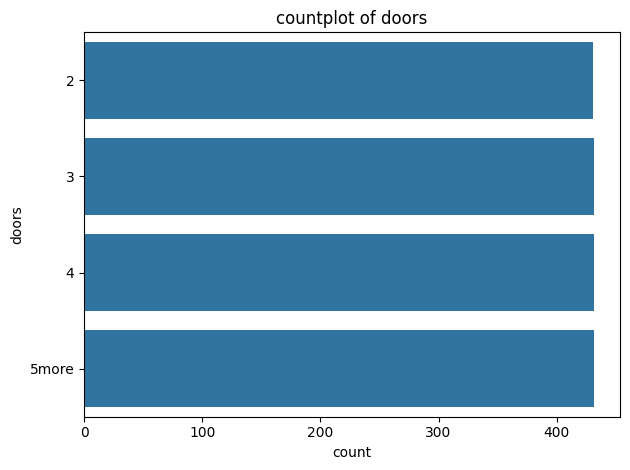

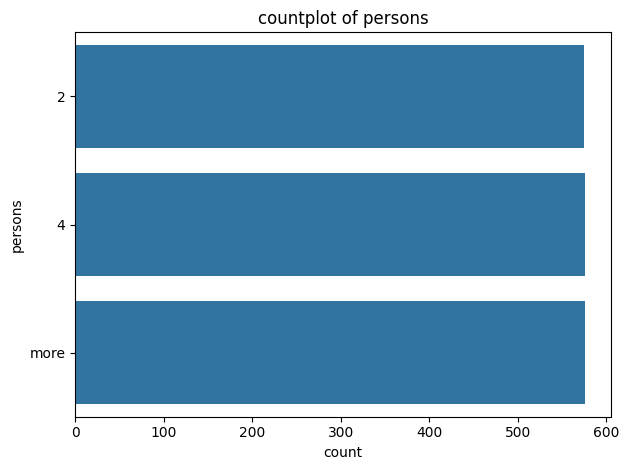

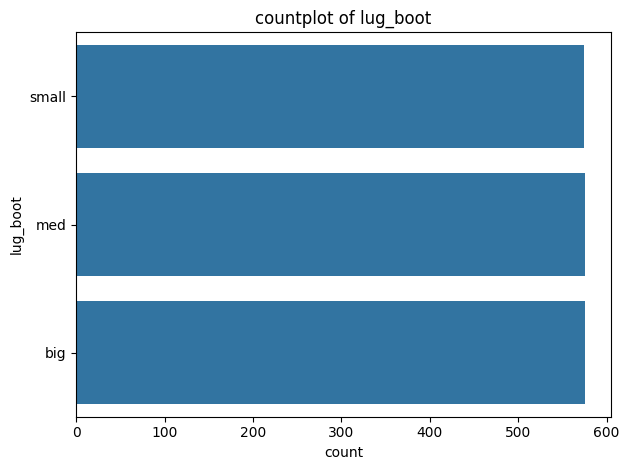

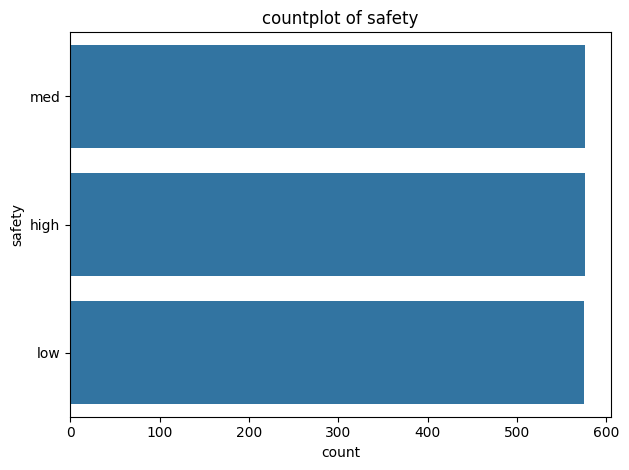

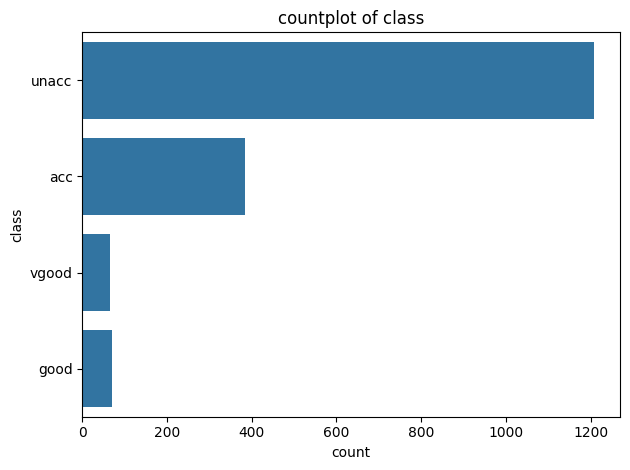

In [ ]:
for col in df:
  sns.countplot(df[col])
  plt.title(f'countplot of {col}')
  plt.tight_layout()
  plt.show()

In [ ]:
label = LabelEncoder()
df['class'] = label.fit_transform(df['class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,2
1,vhigh,vhigh,2,2,small,high,2
2,vhigh,vhigh,2,2,med,low,2
3,vhigh,vhigh,2,2,med,med,2
4,vhigh,vhigh,2,2,med,high,2


In [ ]:
df['class'].value_counts()

,count
class,
2,1209
0,384
1,69
3,65


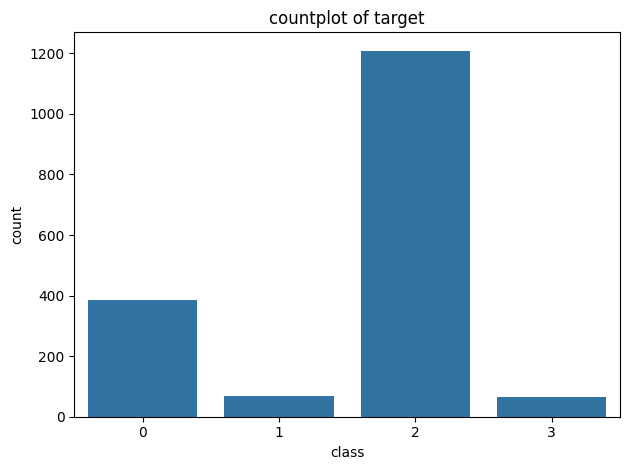

In [ ]:
sns.countplot(data=df, x='class')
plt.title(f'countplot of target')
plt.tight_layout()
plt.show()

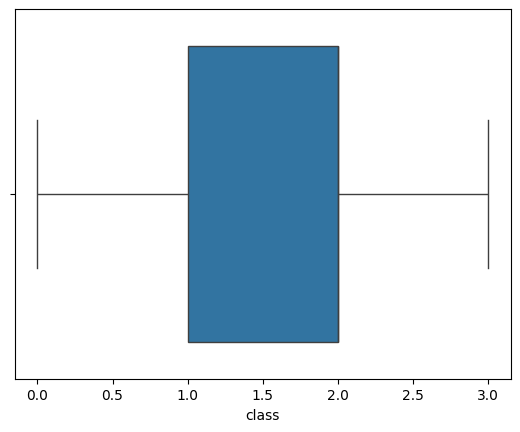

In [ ]:
sns.boxplot(data=df, x='class')
plt.show()

In [ ]:
cat = df.select_dtypes(include=['object','category'])
cat.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [ ]:
en = OrdinalEncoder()
df[cat.columns] = en.fit_transform(cat)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2
1,3.0,3.0,0.0,0.0,2.0,0.0,2
2,3.0,3.0,0.0,0.0,1.0,1.0,2
3,3.0,3.0,0.0,0.0,1.0,2.0,2
4,3.0,3.0,0.0,0.0,1.0,0.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   buying    1727 non-null   float64
 1   maint     1727 non-null   float64
 2   doors     1727 non-null   float64
 3   persons   1727 non-null   float64
 4   lug_boot  1727 non-null   float64
 5   safety    1727 non-null   float64
 6   class     1727 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 94.6 KB


In [ ]:
df = df.select_dtypes(include=np.number).astype(int)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [ ]:
for col in df:
  print(df[col].value_counts())

buying
0    432
2    432
1    432
3    431
Name: count, dtype: int64
maint
0    432
2    432
1    432
3    431
Name: count, dtype: int64
doors
1    432
2    432
3    432
0    431
Name: count, dtype: int64
persons
1    576
2    576
0    575
Name: count, dtype: int64
lug_boot
1    576
0    576
2    575
Name: count, dtype: int64
safety
2    576
0    576
1    575
Name: count, dtype: int64
class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64


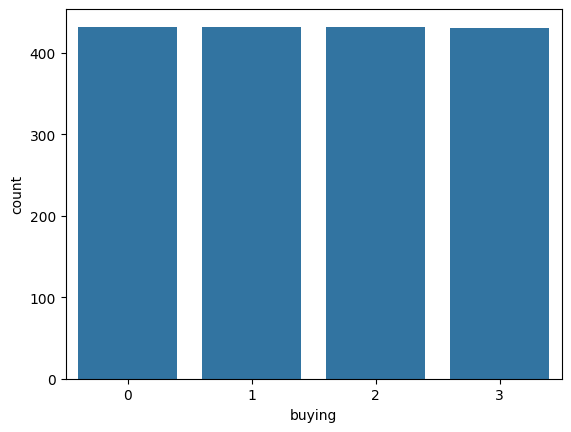

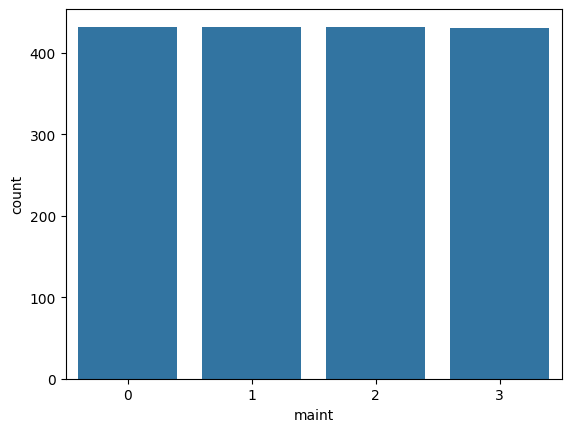

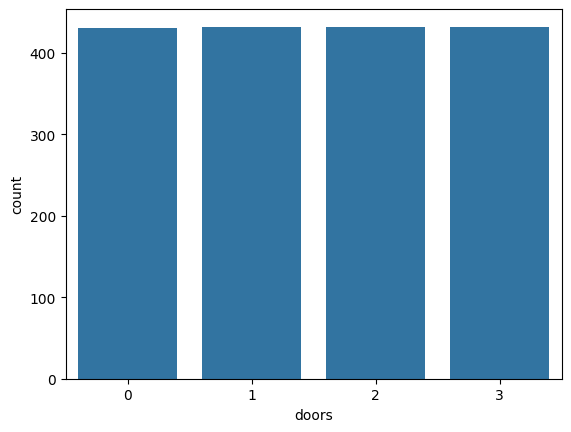

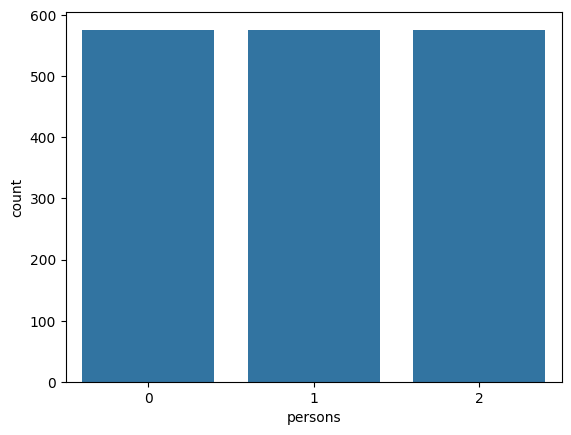

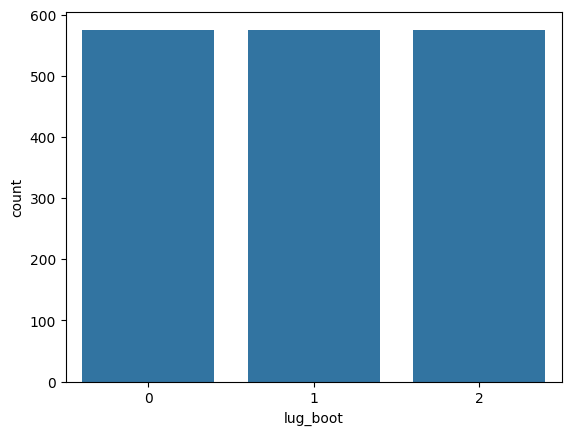

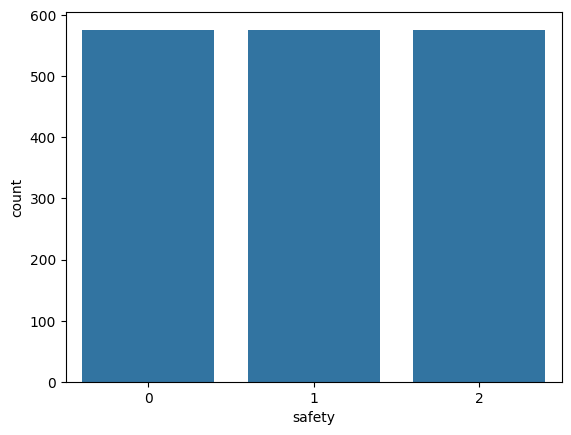

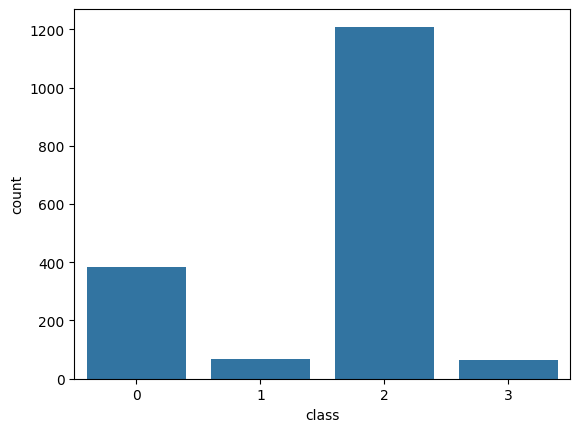

In [ ]:
for col in df:
  sns.countplot(data=df, x=col)
  plt.show()

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape

((1381, 6), (1381,))

In [ ]:
X_test.shape, y_test.shape

((346, 6), (346,))

In [ ]:
sm = SMOTE()

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

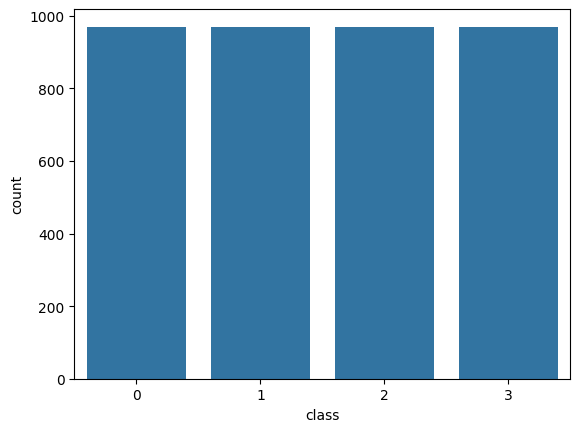

In [ ]:
sns.countplot(data=df, x=y_resampled)
plt.show()

Accuracy Score : 0.5173410404624278
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : [[ 14  22  18  19]
 [  5   2   6   0]
 [ 44  45 145   5]
 [  2   0   1  18]]


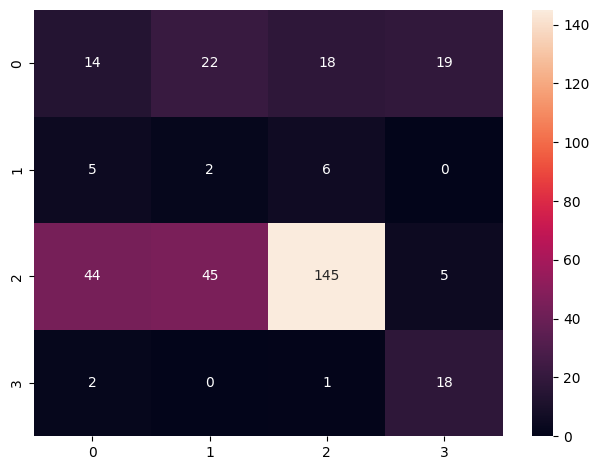

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)

y_pred = lr.predict(X_test)

acc1 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc1}')

repoprt = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : {cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = lr.predict_proba(X_test)

roc_score1 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score : {roc_score1 * 100} ')

ROC AUC Score : 78.00440943543714 


Best Parameters : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Estimator : RandomForestClassifier(max_depth=20, n_estimators=150)
Best Score : 0.9909793814432991
Accuracy Score : 0.9566473988439307
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : 
[[ 71   0   2   0]
 [  2  11   0   0]
 [ 10   0 229   0]
 [  1   0   0  20]]


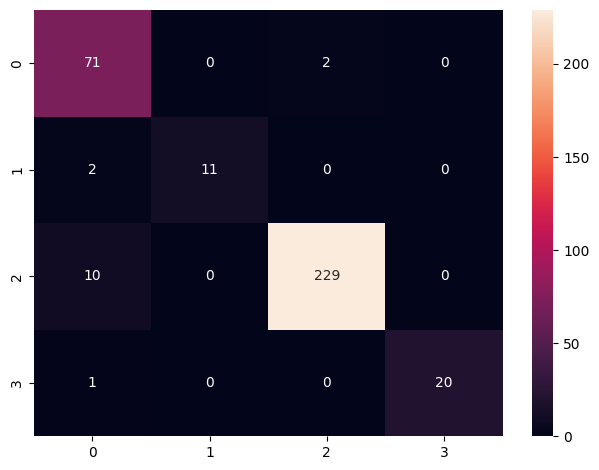

In [ ]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5,10]
}

grid = GridSearchCV(rf, param_grid, cv=5)

grid.fit(X_resampled, y_resampled)

best_params = grid.best_params_
print(f'Best Parameters : {best_params}')

best_estimator = grid.best_estimator_
print(f'Best Estimator : {best_estimator}')

best_score = grid.best_score_
print(f'Best Score : {best_score}')

y_pred = best_estimator.predict(X_test)

acc2 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc2}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = best_estimator.predict_proba(X_test)

roc_score2 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score : {roc_score2 * 100} ')

ROC AUC Score : 99.00114715502761 


In [ ]:
rid = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(rid, param_grid, cv=5)

grid.fit(X_resampled, y_resampled)

best_params = grid.best_params_
print(f'Best Parameters : {best_params}')

best_estimator = grid.best_estimator_
print(f'Best Estimator : {best_estimator}')

best_score = grid.best_score_
print(f'Best Score : {best_score}')

Best Parameters : {'alpha': 100}
Best Estimator : Ridge(alpha=100)
Best Score : -1.6198388341130676


Best Parameters : {'alpha': 100}
Best Estimator : RidgeClassifier(alpha=100)
Best Score : 0.5149484536082474
Accuracy Score : 0.5289017341040463
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : 
[[ 12  21  19  21]
 [  2   3   7   1]
 [ 31  34 148  26]
 [  0   0   1  20]]


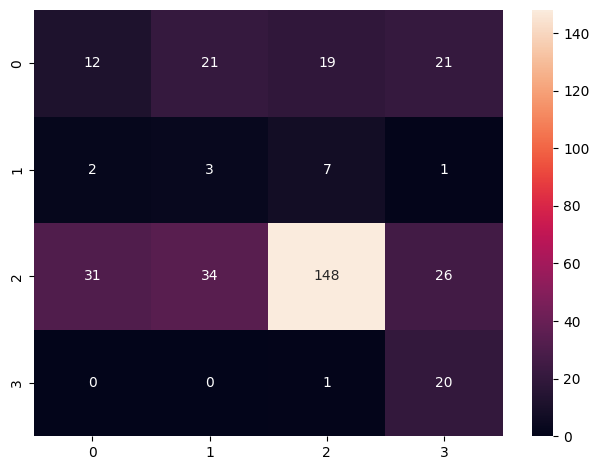

In [ ]:
rc = RidgeClassifier()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(rc, param_grid, cv=5)

grid.fit(X_resampled, y_resampled)

best_params = grid.best_params_
print(f'Best Parameters : {best_params}')

best_estimator = grid.best_estimator_
print(f'Best Estimator : {best_estimator}')

best_score = grid.best_score_
print(f'Best Score : {best_score}')

y_pred = best_estimator.predict(X_test)

acc3 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc3}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
la = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(la, param_grid, cv=5)

grid.fit(X_resampled, y_resampled)

best_params = grid.best_params_
print(f'Best Parameters : {best_params}')

best_estimator = grid.best_estimator_
print(f'Best Estimator : {best_estimator}')

best_score = grid.best_score_
print(f'Best Score : {best_score}')

Best Parameters : {'alpha': 0.1}
Best Estimator : Lasso(alpha=0.1)
Best Score : -1.631004835867838


Accuracy Score : 0.9710982658959537
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : 
[[ 70   0   3   0]
 [  2  11   0   0]
 [  4   0 235   0]
 [  1   0   0  20]]


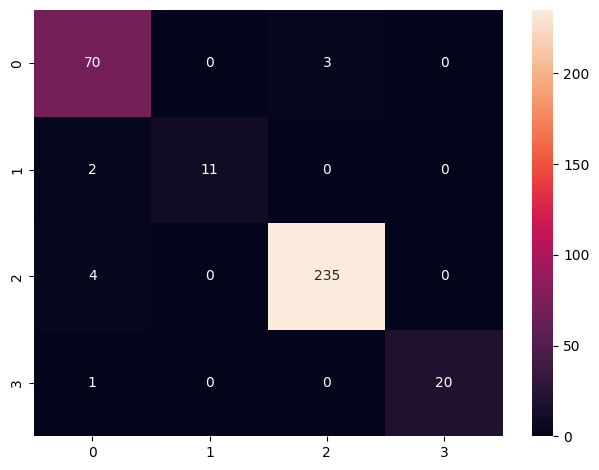

In [ ]:
SVM = SVC(kernel="rbf",gamma=1,C=3, probability=True).fit(X_resampled,y_resampled)
y_pred = SVM.predict(X_test)

acc4 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc4}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = SVM.predict_proba(X_test)

roc_score4 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score : {roc_score4 * 100} ')

ROC AUC Score : 99.02708375995164 


Accuracy Score : 0.5433526011560693
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : 
[[ 32   4   3  34]
 [  2   6   0   5]
 [ 66  10 129  34]
 [  0   0   0  21]]


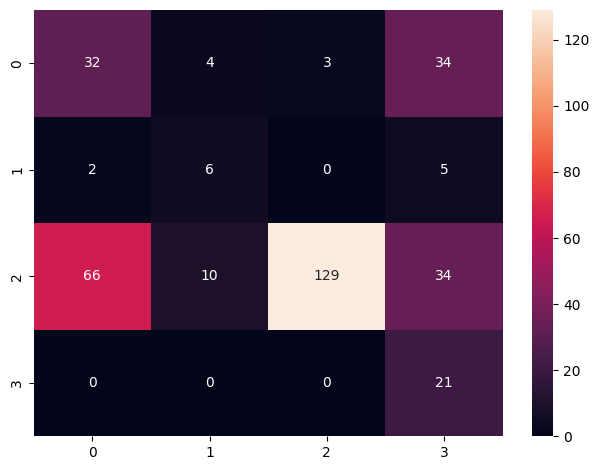

In [ ]:
gnb = GaussianNB()

gnb.fit(X_resampled, y_resampled)

y_pred = gnb.predict(X_test)

acc5 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc5}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = gnb.predict_proba(X_test)

roc_score5 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score : {roc_score5 * 100} ')

ROC AUC Score : 82.27067191556763 


Accuracy Score : 0.8294797687861272
Classification Report : 
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        73
           1       0.03      0.15      0.05        13
           2       0.85      0.61      0.71       239
           3       0.43      0.86      0.57        21

    accuracy                           0.52       346
   macro avg       0.38      0.45      0.38       346
weighted avg       0.66      0.52      0.57       346

Confusion Matrix : 
[[ 67   5   0   1]
 [  0  12   0   1]
 [ 49   2 188   0]
 [  0   1   0  20]]


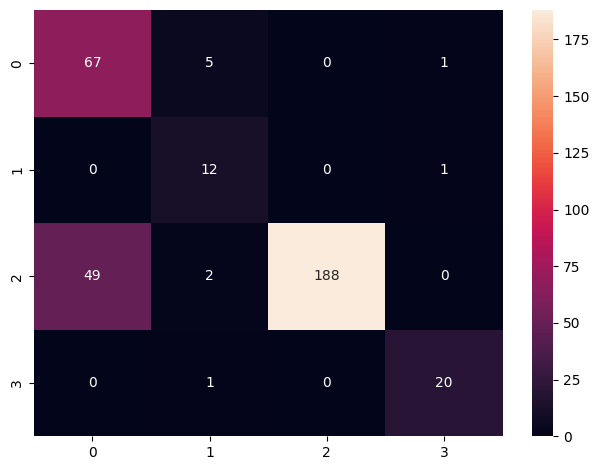

In [ ]:
cnb = CategoricalNB()

cnb.fit(X_resampled, y_resampled)

y_pred = cnb.predict(X_test)

acc6 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc6}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{repoprt}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()

MultinomialNB

In [ ]:
y_pred_prob = cnb.predict_proba(X_test)

roc_score6 = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC Score : {roc_score6 * 100} ')

ROC AUC Score : 97.32549162725789 


Best parameters found:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best score achieved:  0.9930412371134022
Accuracy Score : 0.9826589595375722
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        73
           1       1.00      0.85      0.92        13
           2       1.00      0.99      0.99       239
           3       1.00      0.95      0.98        21

    accuracy                           0.98       346
   macro avg       0.98      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346

Confusion Matrix : 
[[ 73   0   0   0]
 [  2  11   0   0]
 [  3   0 236   0]
 [  1   0   0  20]]


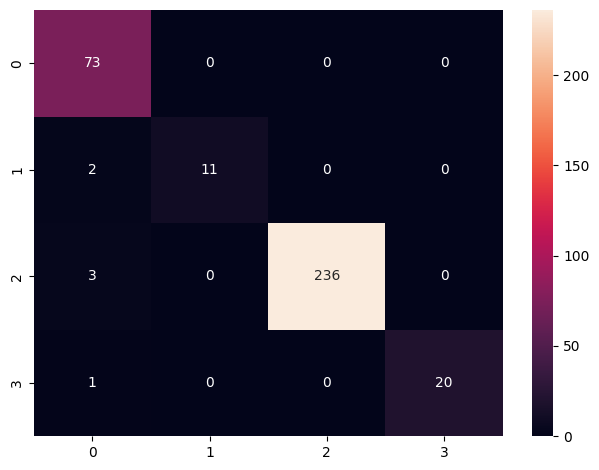

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

# Create an SVM model
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Print the best score achieved
print("Best score achieved: ", grid_search.best_score_)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Evaluate the best estimator on the test data
y_pred = best_svm.predict(X_test)

acc7 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {acc7}')

report = classification_report(y_test, y_pred)
print(f'Classification Report : \n{report}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(cm, annot=True, fmt='d')
plt.tight_layout()
plt.show()



In [ ]:

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Ridge Classifier', 'SVM', 'Gaussian NB', 'Categorical NB', 'Optimized SVM'],
    'Accuracy': [acc1, acc2, acc3, acc4, acc5, acc6, acc7],
    'ROC AUC Score': [roc_score1 * 100, roc_score2 * 100, None, roc_score4 * 100, roc_score5 * 100, roc_score6 * 100, None]
}


results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  ROC AUC Score
0  Logistic Regression  0.517341      78.004409
1        Random Forest  0.956647      99.001147
2     Ridge Classifier  0.528902            NaN
3                  SVM  0.971098      99.027084
4          Gaussian NB  0.543353      82.270672
5       Categorical NB  0.829480      97.325492
6        Optimized SVM  0.982659            NaN


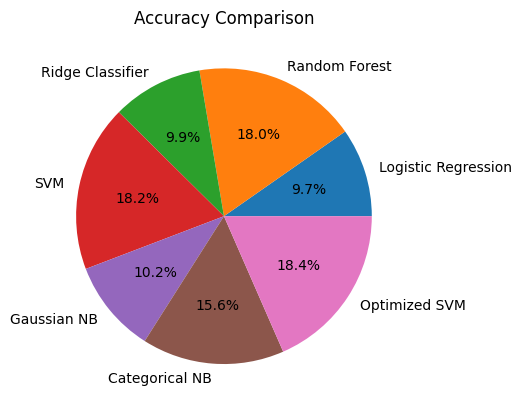

In [ ]:
plt.pie(results_df['Accuracy'], labels=results_df['Model'], autopct='%1.1f%%')
plt.title('Accuracy Comparison')
plt.show()

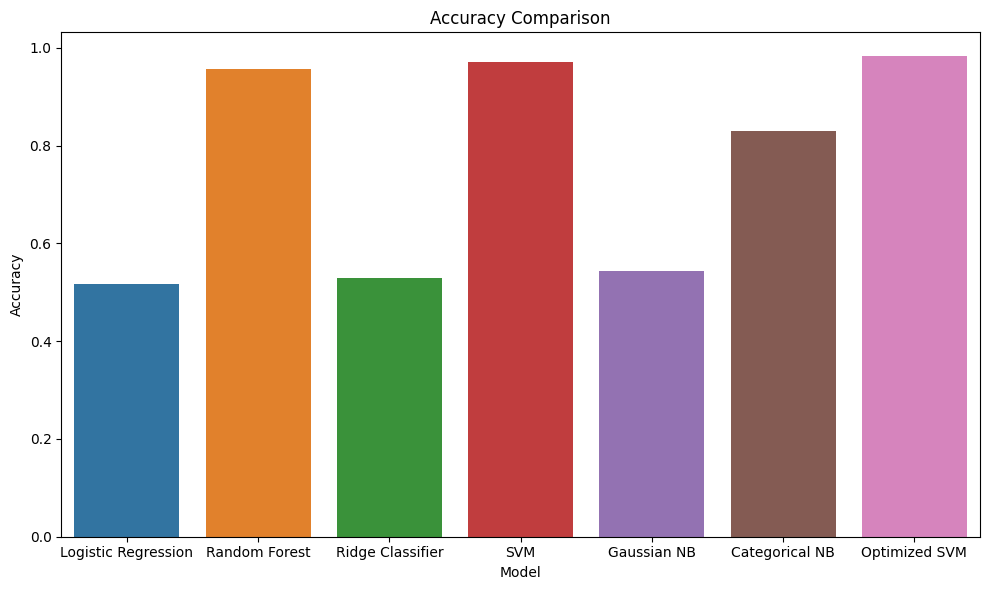

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model', y='Accuracy',hue='Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.tight_layout()
plt.show()